In [1]:
import pandas as pd
from tqdm  import tqdm
import os, glob, shutil
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from IPython.display import Image
print("Setup Complete")

Setup Complete


## Validation space - 1
- Goes through all the txt files and checks for repetitive lines
- run on a folder containing a list of text files

In [5]:
import os

os.chdir('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/')
src_dir = 'images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/txt'
src_dir = 'images/H_Dataset_02/txt'

flist = os.listdir(src_dir)

# Search repetitive lines    
for fname in tqdm(flist):
    fpath = os.path.join(src_dir, fname)
    with open(fpath, 'r') as f:
        data = f.readlines()
    
    for i, line in enumerate(data[:-1]):
        if line in data[i+1:]:
            print("[ERROR]: ",fname,"\t->\t", line)    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<00:00, 9073.05it/s]


## Validation space - 2
- Dimension checker
- Read only

In [8]:
import os, cv2
import pandas as pd

    
os.chdir('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/')
src_dir = 'images/H_Dataset_02/txt'
img_dir = 'images/H_Dataset_02/img'

def dim_validator(df, msg ="Dimesion analysis complete!"):
    _temp = df[df['xmax']<df['xmin']]
    if (len(_temp)): print("df[df['xmax']<df['xmin']]",_temp)

    _temp = df[df['ymax']<df['ymin']]
    if (len(_temp)): print("df[df['ymax']<df['ymin']]",_temp)

    _temp = df[df['height']<df['ymin']]
    if (len(_temp)): print("df[df['height']<df['ymin']]\n",_temp)

    _temp = df[df['height']<df['ymax']]
    if (len(_temp)): print("df[df['height']<df['ymax']]\n",_temp)

    _temp = df[df['width']<df['xmin']]
    if (len(_temp)): print("df[df['width']<df['xmin']]\n",_temp)

    _temp = df[df['width']<df['xmax']]
    if (len(_temp)): print(" df[df['width']<df['xmax']]\n",_temp)

    if (len(df[df['width']< 1]) or len(df[df['height']<1])): print("Negative dimension")
    if (len(df[df['xmin']<  1]) or len(df[df['xmax']<1])): print("Negative dimension x")
    if (len(df[df['ymin']<  1]) or len(df[df['ymax']<1])): print("Negative dimension y")
    # print(msg)    
    


# Search repetitive lines    
flist = os.listdir(src_dir)
columns_names= ['xmin', 'ymin', 'xmax', 'ymax', 'class']
for fname in tqdm(flist):
    fpath = os.path.join(src_dir, fname)
    #img_path=os.path.join(img_dir, fname.replace('.txt','_8.jpg'))
    img_path=os.path.join(img_dir, fname.replace('.txt','.jpg'))
    if not os.path.exists(fpath):
        print("[ERROR]: Missing {}".format(fpath))
    if not os.path.exists(img_path):
        print("[ERROR]: Missing {}".format(img_path))
    img = cv2.imread(img_path)
    
    df = pd.read_csv(fpath, names=columns_names)
    df['height'], df['width'],_= img.shape
    dim_validator(df, msg ="Analysis complete for {}!\n".format(fname))
    


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:06<00:00, 36.43it/s]


## Validation space - 3
- 1 Body per textfile

Scan of 245 files completed!


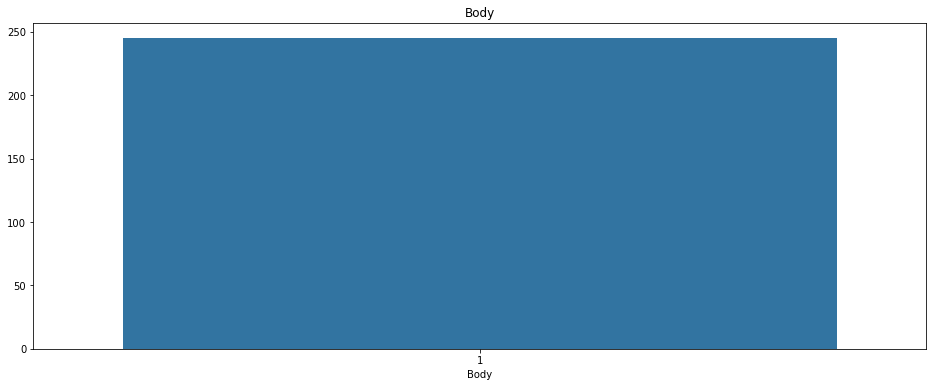

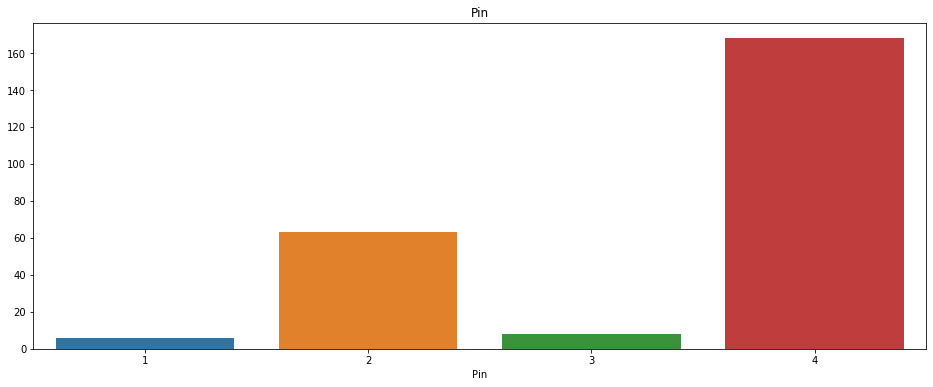

In [10]:
import os
import pandas as pd
from tqdm import tqdm
import seaborn as sns

os.chdir('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/')
body_count_list=[]
pin_count_list=[]

body_label=1
pin_label=0
body_label=0
pin_label=1

def isOneBodyLabel(lines):
    count = 0
    for line in lines:
        if (int(line.strip().split(',')[-1])== body_label): count = count + 1
            
    #  Return
    body_count_list.append(count)
    pin_count_list.append(len(lines)-count)
    if (count == 1): 
        return True, count
    else:
        return False, count
    
    
# Txt files
src_dir = 'images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/txt'
src_dir = 'images/H_Dataset_02/txt'
flist = os.listdir(src_dir)
for fname in flist:
    fpath = os.path.join(src_dir, fname)
    with open(fpath, 'r') as f:
        data = f.readlines()
        #print(fpath, data)
        
    flag, count = isOneBodyLabel(data)    
    if not (flag):
        print("[ERROR]\t {}: \tMultiple body {}".format(fname, count) )
        
print("Scan of {} files completed!".format(len(flist)))


body_count_df = pd.DataFrame({'Body': body_count_list})
pin_count_df = pd.DataFrame({'Pin':  pin_count_list})

plt.figure(figsize=(16,6))
plt.title("Body")
sns.barplot(x=body_count_df.groupby('Body').Body.count().index, y=body_count_df.groupby('Body').Body.count().values)
plt.figure(figsize=(16,6))
plt.title("Pin")
sns.barplot(x=pin_count_df.groupby('Pin').Pin.count().index, y=pin_count_df.groupby('Pin').Pin.count().values)


## Generatation Train and test

In [1]:
# from  scripts.ShuffleAndSeparate import ShuffleAndSeparateToTrainTestSet as genDatasetCsv
from  scripts.ShuffleAndSeparate import SingleImageShuffleAndSeparateToTrainTestSet as genDatasetCsv

# Extraction
root_dir=r'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/AGIH-VR-G2571-61103-panelized'
root_dir=r'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_02'
root_dir=r'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_02/H_Dataset_02_PinOnly'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_04'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_05/gray'
root_dir='D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_05/pintype'



genDatasetCsv(directory=root_dir, input_img_arg="img", input_txt_arg='txt', input_test_ratio=0.02)

Items: 3:   0%|                                                                                                                                                                                                                                  | 0/521 [00:00<?, ?it/s]

Using default IMG_DIR = D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_05/pintype\img
Using default txt_DIR = D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_05/pintype\txt
Using default input_test_ratio = 0.02
[Processing] 532 files are found in directory named txt
[Processing] 11 files in test set
[Processing] 521 files in train_set
[Processing] Copying of test dataset
[Processing] Copying of train dataset


Items: 520: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 521/521 [00:07<00:00, 70.50it/s]

[Processing] Finish Process


In [3]:
reverse_dictionary

{0: 'PIN', 1: 'BODY'}